# 数据科学导论大作业
***

## 一、数据集的导入
***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
#数据样例
test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,OUC2ARDQ,Female,30,RG275,Salaried,X1,25,No,984562,Yes
1,CUXDNKUA,Male,51,RG254,Self_Employed,X2,62,No,1102184,Yes
2,MCPI8ITG,Male,39,RG269,Self_Employed,X1,38,No,737053,Yes
3,UAZ4QB7A,Female,35,RG282,Salaried,X1,33,No,1839229,No
4,UNGD4ORF,Female,63,RG283,Other,X2,80,No,1627729,No


In [3]:
test.shape

(49145, 10)

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49145 entries, 0 to 49144
Data columns (total 10 columns):
ID                     49145 non-null object
Gender                 49145 non-null object
Age                    49145 non-null int64
Region_Code            49145 non-null object
Occupation             49145 non-null object
Channel_Code           49145 non-null object
Vintage                49145 non-null int64
Credit_Product         43184 non-null object
Avg_Account_Balance    49145 non-null int64
Is_Active              49145 non-null object
dtypes: int64(3), object(7)
memory usage: 3.7+ MB


In [5]:
#数据样例
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,SCVAQHXI,Female,29,RG277,Salaried,X1,26,No,302875,No,0
1,BHYZRTQT,Female,47,RG276,Self_Employed,X1,15,No,645552,Yes,0
2,6STHBLXU,Male,44,RG283,Self_Employed,X3,85,No,725777,Yes,0
3,KVFKFAM7,Male,77,RG268,Other,X3,49,No,2297704,Yes,0
4,RMCZIYYW,Female,84,RG279,Other,X2,93,No,555199,No,1


In [6]:
train.shape

(196580, 11)

In [7]:
train.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,196580.000000,196580.000000,1.965800e+05,196580.000000
mean,43.873812,47.038422,1.128338e+06,0.236937
std,14.833586,32.397558,8.524013e+05,0.425204
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.041320e+05,0.000000
50%,43.000000,32.000000,8.942495e+05,0.000000
75%,54.000000,74.000000,1.366154e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


该数据集分为训练数据集和测试数据集  
训练数据集为11维，共196580条数据，预测目标为Is_Lead。  
测试数据集为10维，不含Is_Lead属性，共49145条数据  

**属性说明**

| Variable          | Definition                                                   |
| ----------------- | ------------------------------------------------------------ |
| ID                | ID for Customer                                              |
| Gender            | Gender of Customer                                           |
| Age               | Age of Customer                                              |
| Region_Code       | Code of the Region for the Customer                          |
| Occupation        | Occupation Type for the Customer                             |
| Channel_Code      | Acquisition Channel Code for the Customer(Encoded)           |
| Vintage           | Vintage for the Customer(In Months)                          |
| Credit_Product    | If the Customer has any active credit product                |
| AvgAccountBalance | Average Account Balance for the Customer in last 12 Months   |
| Is_Active         | If the Customer is Active in last 3 Months                   |
| Is_Lead(Target)   | If the Customer is interested for the Credit Card                         0:not interested                    1:interested |


**类型统计**

## 二、数据预处理
***

### 缺失值处理

In [8]:
#检测缺失值
train.isnull().any()

ID                     False
Gender                 False
Age                    False
Region_Code            False
Occupation             False
Channel_Code           False
Vintage                False
Credit_Product          True
Avg_Account_Balance    False
Is_Active              False
Is_Lead                False
dtype: bool

Credit_Product 有数据缺失  
Credit_Product --------If the Customer has any active credit product  
该项对于Is_lead影响较大


In [9]:
#查看缺失情况

nullTotal = train['Credit_Product'].isnull().sum()
percent = nullTotal / train['Credit_Product'].isnull().count() * 100
print(nullTotal,'  ','%.2f%%'%percent)

23364    11.89%


缺失值一共23364个，占总数的11.89%  
该属性是一个二元属性，无法采用均值填充的方法  
这里采用回归分析，使用其他的信息来预测空值

**对Credit_Product的缺失值回归**

**特征选择和处理**

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(train['Gender'])
train['Gender']=le.transform(train['Gender'])

le.fit(train['Region_Code'])
train['Region_Code']=le.transform(train['Region_Code'])

le.fit(train['Channel_Code'])
train['Channel_Code']=le.transform(train['Channel_Code'])

le.fit(train['Credit_Product'])
train['Credit_Product']=le.transform(train['Credit_Product'])

le.fit(train['Is_Active'])
train['Is_Active']=le.transform(train['Is_Active'])

le.fit(train['Occupation'])
train['Occupation']=le.transform(train['Occupation'])

train.head()



,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,SCVAQHXI,0,29,27,2,0,26,0,302875,0,0
1,BHYZRTQT,0,47,26,3,0,15,0,645552,1,0
2,6STHBLXU,1,44,33,3,2,85,0,725777,1,0
3,KVFKFAM7,1,77,18,1,2,49,0,2297704,1,0
4,RMCZIYYW,0,84,29,1,1,93,0,555199,0,1


In [11]:
#查看Credit_Product的类型种类

train['Credit_Product'].value_counts(ascending = False)


0    115428
1     57788
2     23364
Name: Credit_Product, dtype: int64

2对应空值

In [12]:
#将含有缺失值的作为目标集，不含缺失值的作为训练集

df_target = train.copy()
df_target = df_target[train['Credit_Product'].isin([2])]
df_target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23364 entries, 20 to 196565
Data columns (total 11 columns):
ID                     23364 non-null object
Gender                 23364 non-null int32
Age                    23364 non-null int64
Region_Code            23364 non-null int32
Occupation             23364 non-null int32
Channel_Code           23364 non-null int32
Vintage                23364 non-null int64
Credit_Product         23364 non-null int32
Avg_Account_Balance    23364 non-null int64
Is_Active              23364 non-null int32
Is_Lead                23364 non-null int64
dtypes: int32(6), int64(4), object(1)
memory usage: 1.6+ MB


不含缺失值的数据作为训练集

In [13]:
#训练集

df_train = train.copy()
df_train = df_train[~train['Credit_Product'].isin([2])]
df_train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,SCVAQHXI,0,29,27,2,0,26,0,302875,0,0
1,BHYZRTQT,0,47,26,3,0,15,0,645552,1,0
2,6STHBLXU,1,44,33,3,2,85,0,725777,1,0
3,KVFKFAM7,1,77,18,1,2,49,0,2297704,1,0
4,RMCZIYYW,0,84,29,1,1,93,0,555199,0,1


In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173216 entries, 0 to 196579
Data columns (total 11 columns):
ID                     173216 non-null object
Gender                 173216 non-null int32
Age                    173216 non-null int64
Region_Code            173216 non-null int32
Occupation             173216 non-null int32
Channel_Code           173216 non-null int32
Vintage                173216 non-null int64
Credit_Product         173216 non-null int32
Avg_Account_Balance    173216 non-null int64
Is_Active              173216 non-null int32
Is_Lead                173216 non-null int64
dtypes: int32(6), int64(4), object(1)
memory usage: 11.9+ MB


### 对缺失值的预测

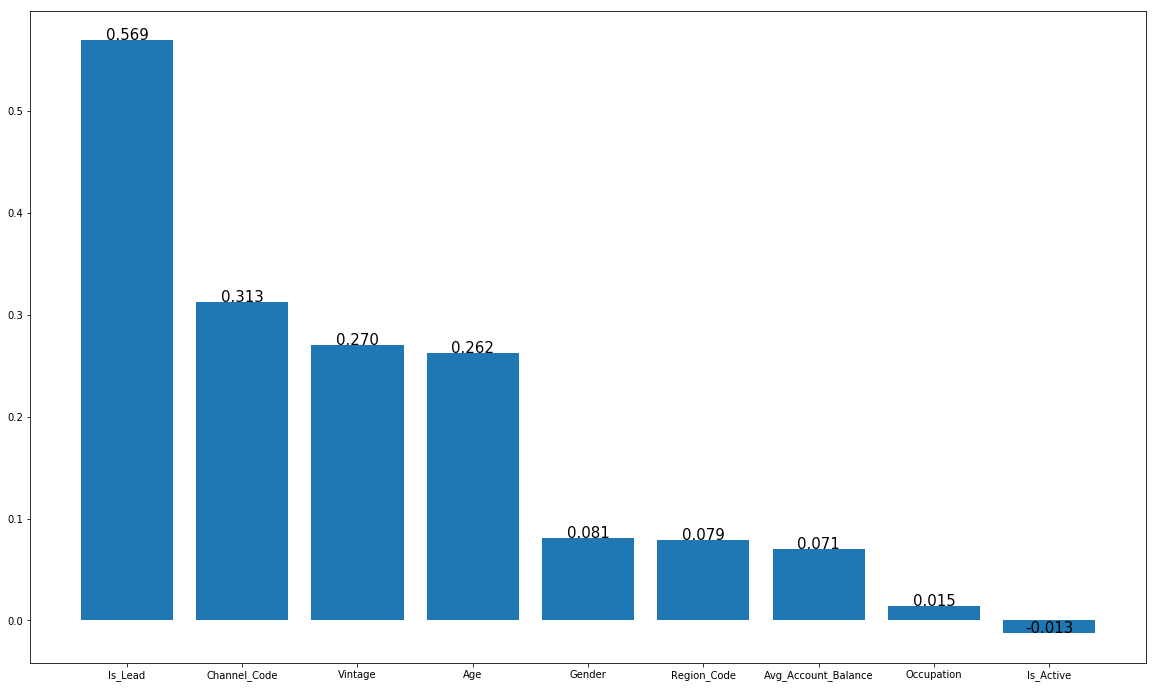

In [15]:
#查看各特征值与是否可能成为有过信用卡特征的相关性
df_corr_lead=train.corr()[u'Credit_Product'].sort_values(ascending=False)
df_corr_lead=df_corr_lead.drop(['Credit_Product'],axis=0)
#对其进行可视化
plt.figure(figsize=(20,12),)
plt.bar(list(df_corr_lead.index),df_corr_lead.values)
for i,j in zip(list(df_corr_lead.index),df_corr_lead.values):
    plt.text(i,j,'%s'%('{:.3f}'.format(j)),ha='center',size=15)
plt.show()

从图中可以看出Is_Lead，Channel_Code, Vintage，Age对与结果有相对大的相关性 我们不妨只保留这四个特征值，建立模型，进行预测。

#### LightGBM模型

In [43]:
#训练集划分
from sklearn.model_selection import train_test_split
from sklearn import metrics

y=df_train['Credit_Product']
df_train1=df_train.drop(['Credit_Product','ID','Region_Code'],axis=1)

x_train_all, x_predict, y_train_all, y_predict = train_test_split(df_train1, y, test_size=0.10, random_state=100)

x_train, x_test, y_train, y_test = train_test_split(x_train_all, y_train_all, test_size=0.2, random_state=100)

import lightgbm as lgb

train_data = lgb.Dataset(data=x_train,label=y_train)
test_data = lgb.Dataset(data=x_test,label=y_test)

In [44]:
#使用lgbm模型开始调参

import lightgbm as lgb
from hyperopt import fmin, tpe, hp, partial
train_data = lgb.Dataset(data=x_train,label=y_train)
test_data = lgb.Dataset(data=x_test,label=y_test)

In [45]:
# 自定义hyperopt的参数空间
space = {"max_depth": hp.randint("max_depth", 15),
         "num_trees": hp.randint("num_trees", 300),
         'learning_rate': hp.uniform('learning_rate', 1e-3, 5e-1),
         "bagging_fraction": hp.randint("bagging_fraction", 5),
         "num_leaves": hp.randint("num_leaves", 6),
         }

def argsDict_tranform(argsDict, isPrint=False):
    argsDict["max_depth"] = argsDict["max_depth"] + 5
    argsDict['num_trees'] = argsDict['num_trees'] + 150
    argsDict["learning_rate"] = argsDict["learning_rate"] * 0.02 + 0.05
    argsDict["bagging_fraction"] = argsDict["bagging_fraction"] * 0.1 + 0.5
    argsDict["num_leaves"] = argsDict["num_leaves"] * 3 + 10
    if isPrint:
        print(argsDict)
    else:
        pass

    return argsDict

In [46]:
def lightgbm_factory(argsDict):
    argsDict = argsDict_tranform(argsDict)
    
    params = {'nthread': -1,  # 进程数
              'max_depth': argsDict['max_depth'],  # 最大深度
              'num_trees': argsDict['num_trees'],  # 树的数量
              'eta': argsDict['learning_rate'],  # 学习率
              'bagging_fraction': argsDict['bagging_fraction'],  # 采样数
              'num_leaves': argsDict['num_leaves'],  # 终点节点最小样本占比的和
              'objective': 'regression',
              'feature_fraction': 0.7,  # 样本列采样
              'lambda_l1': 0,  # L1 正则化
              'lambda_l2': 0,  # L2 正则化
              'bagging_seed': 42,  # 随机种子,light中默认为100
              }
    params['metric'] = ['auc']

    model_lgb = lgb.train(params, train_data, num_boost_round=500, valid_sets=[test_data],early_stopping_rounds=100)

    return get_tranformer_score(model_lgb)

def get_tranformer_score(tranformer):
    
    model = tranformer
    prediction = model.predict(x_predict, num_iteration=model.best_iteration)
    fpr, tpr, threshold = metrics.roc_curve(y_predict, prediction)
    roc_auc = metrics.auc(fpr, tpr)
  
    return roc_auc



In [47]:
# 开始使用hyperopt进行自动调参
algo = partial(tpe.suggest, n_startup_jobs=5)
best = fmin(lightgbm_factory, space, algo=algo, max_evals=50, pass_expr_memo_ctrl=None)

  0%|                                                                           | 0/50 [00:00<?, ?trial/s, best loss=?]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

D:\Anaconda\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000718 seconds.             
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136                                                                                       
[LightGBM] [Info] Number of data points in the train set: 124715, number of used features: 4                           
[LightGBM] [Info] Start training from score 0.332021                                                                   
[1]	valid_0's auc: 0.700844                                                                                            
Training until validation scores don't improve for 100 rounds                                                          
[2]	valid_0's auc: 0.707606                                                                                            
[3]	valid_0's auc: 0.709562           

[131]	valid_0's auc: 0.718187                                                                                          
[132]	valid_0's auc: 0.71819                                                                                           
[133]	valid_0's auc: 0.71819                                                                                           
[134]	valid_0's auc: 0.718185                                                                                          
[135]	valid_0's auc: 0.718199                                                                                          
[136]	valid_0's auc: 0.718209                                                                                          
[137]	valid_0's auc: 0.718202                                                                                          
[138]	valid_0's auc: 0.718189                                                                                          
[139]	valid_0's auc: 0.718188           

[267]	valid_0's auc: 0.718952                                                                                          
[268]	valid_0's auc: 0.718962                                                                                          
[269]	valid_0's auc: 0.718958                                                                                          
[270]	valid_0's auc: 0.718965                                                                                          
[271]	valid_0's auc: 0.718973                                                                                          
[272]	valid_0's auc: 0.718992                                                                                          
[273]	valid_0's auc: 0.718998                                                                                          
[274]	valid_0's auc: 0.718997                                                                                          
[275]	valid_0's auc: 0.719006           

D:\Anaconda\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

D:\Anaconda\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000767 seconds.             
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136                                                                                       
[LightGBM] [Info] Number of data points in the train set: 124715, number of used features: 4                           
[LightGBM] [Info] Start training from score 0.332021                                                                   
[1]	valid_0's auc: 0.70893                                                                                             
Training until validation scores don't improve for 100 rounds                                                          
[2]	valid_0's auc: 0.713376                                                                                            
[3]	valid_0's auc: 0.715437           

[131]	valid_0's auc: 0.718656                                                                                          
[132]	valid_0's auc: 0.718656                                                                                          
[133]	valid_0's auc: 0.718665                                                                                          
[134]	valid_0's auc: 0.718641                                                                                          
[135]	valid_0's auc: 0.718638                                                                                          
[136]	valid_0's auc: 0.718645                                                                                          
[137]	valid_0's auc: 0.718639                                                                                          
[138]	valid_0's auc: 0.718625                                                                                          
[139]	valid_0's auc: 0.718611           

D:\Anaconda\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

D:\Anaconda\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000808 seconds.             
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136                                                                                       
[LightGBM] [Info] Number of data points in the train set: 124715, number of used features: 4                           
[LightGBM] [Info] Start training from score 0.332021                                                                   
[1]	valid_0's auc: 0.707343                                                                                            
Training until validation scores don't improve for 100 rounds                                                          
[2]	valid_0's auc: 0.712346                                                                                            
[3]	valid_0's auc: 0.714829           

[131]	valid_0's auc: 0.718622                                                                                          
[132]	valid_0's auc: 0.71863                                                                                           
[133]	valid_0's auc: 0.718642                                                                                          
[134]	valid_0's auc: 0.718642                                                                                          
[135]	valid_0's auc: 0.718666                                                                                          
[136]	valid_0's auc: 0.71867                                                                                           
[137]	valid_0's auc: 0.71868                                                                                           
[138]	valid_0's auc: 0.718686                                                                                          
[139]	valid_0's auc: 0.718662           

[267]	valid_0's auc: 0.718836                                                                                          
[268]	valid_0's auc: 0.718838                                                                                          
[269]	valid_0's auc: 0.718865                                                                                          
[270]	valid_0's auc: 0.718876                                                                                          
[271]	valid_0's auc: 0.718867                                                                                          
[272]	valid_0's auc: 0.718876                                                                                          
[273]	valid_0's auc: 0.71887                                                                                           
[274]	valid_0's auc: 0.71887                                                                                           
[275]	valid_0's auc: 0.71887            

D:\Anaconda\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

D:\Anaconda\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000673 seconds.             
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136                                                                                       
[LightGBM] [Info] Number of data points in the train set: 124715, number of used features: 4                           
[LightGBM] [Info] Start training from score 0.332021                                                                   
[1]	valid_0's auc: 0.707343                                                                                            
Training until validation scores don't improve for 100 rounds                                                          
[2]	valid_0's auc: 0.712346                                                                                            
[3]	valid_0's auc: 0.714938           

[131]	valid_0's auc: 0.718794                                                                                          
[132]	valid_0's auc: 0.718783                                                                                          
[133]	valid_0's auc: 0.718787                                                                                          
[134]	valid_0's auc: 0.718772                                                                                          
[135]	valid_0's auc: 0.71876                                                                                           
[136]	valid_0's auc: 0.718779                                                                                          
[137]	valid_0's auc: 0.718775                                                                                          
[138]	valid_0's auc: 0.718761                                                                                          
[139]	valid_0's auc: 0.718754           

[267]	valid_0's auc: 0.719028                                                                                          
[268]	valid_0's auc: 0.719026                                                                                          
[269]	valid_0's auc: 0.71903                                                                                           
[270]	valid_0's auc: 0.719031                                                                                          
[271]	valid_0's auc: 0.719068                                                                                          
[272]	valid_0's auc: 0.719063                                                                                          
[273]	valid_0's auc: 0.71906                                                                                           
[274]	valid_0's auc: 0.719073                                                                                          
[275]	valid_0's auc: 0.719071           

D:\Anaconda\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

D:\Anaconda\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000706 seconds.             
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136                                                                                       
[LightGBM] [Info] Number of data points in the train set: 124715, number of used features: 4                           
[LightGBM] [Info] Start training from score 0.332021                                                                   
[1]	valid_0's auc: 0.707499                                                                                            
Training until validation scores don't improve for 100 rounds                                                          
[2]	valid_0's auc: 0.712635                                                                                            
[3]	valid_0's auc: 0.714841           

[131]	valid_0's auc: 0.718497                                                                                          
[132]	valid_0's auc: 0.718503                                                                                          
[133]	valid_0's auc: 0.718496                                                                                          
[134]	valid_0's auc: 0.718496                                                                                          
[135]	valid_0's auc: 0.718496                                                                                          
[136]	valid_0's auc: 0.718505                                                                                          
[137]	valid_0's auc: 0.718514                                                                                          
[138]	valid_0's auc: 0.718522                                                                                          
[139]	valid_0's auc: 0.718539           

[267]	valid_0's auc: 0.718819                                                                                          
[268]	valid_0's auc: 0.71882                                                                                           
[269]	valid_0's auc: 0.718812                                                                                          
[270]	valid_0's auc: 0.718812                                                                                          
[271]	valid_0's auc: 0.718831                                                                                          
[272]	valid_0's auc: 0.718833                                                                                          
[273]	valid_0's auc: 0.718851                                                                                          
[274]	valid_0's auc: 0.718843                                                                                          
[275]	valid_0's auc: 0.718839           

D:\Anaconda\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

D:\Anaconda\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000743 seconds.             
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136                                                                                       
[LightGBM] [Info] Number of data points in the train set: 124715, number of used features: 4                           
[LightGBM] [Info] Start training from score 0.332021                                                                   
[1]	valid_0's auc: 0.707499                                                                                            
Training until validation scores don't improve for 100 rounds                                                          
[2]	valid_0's auc: 0.712635                                                                                            
[3]	valid_0's auc: 0.714845           

[131]	valid_0's auc: 0.718791                                                                                          
[132]	valid_0's auc: 0.718794                                                                                          
[133]	valid_0's auc: 0.718774                                                                                          
[134]	valid_0's auc: 0.718742                                                                                          
[135]	valid_0's auc: 0.718755                                                                                          
[136]	valid_0's auc: 0.718774                                                                                          
[137]	valid_0's auc: 0.71878                                                                                           
[138]	valid_0's auc: 0.718773                                                                                          
[139]	valid_0's auc: 0.718781           

[267]	valid_0's auc: 0.719035                                                                                          
[268]	valid_0's auc: 0.719037                                                                                          
[269]	valid_0's auc: 0.719029                                                                                          
[270]	valid_0's auc: 0.719024                                                                                          
[271]	valid_0's auc: 0.719025                                                                                          
[272]	valid_0's auc: 0.719039                                                                                          
[273]	valid_0's auc: 0.719039                                                                                          
[274]	valid_0's auc: 0.719045                                                                                          
[275]	valid_0's auc: 0.719035           

D:\Anaconda\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

D:\Anaconda\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000724 seconds.             
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136                                                                                       
[LightGBM] [Info] Number of data points in the train set: 124715, number of used features: 4                           
[LightGBM] [Info] Start training from score 0.332021                                                                   
[1]	valid_0's auc: 0.703773                                                                                            
Training until validation scores don't improve for 100 rounds                                                          
[2]	valid_0's auc: 0.70916                                                                                             
[3]	valid_0's auc: 0.711693           

[131]	valid_0's auc: 0.718241                                                                                          
[132]	valid_0's auc: 0.718231                                                                                          
[133]	valid_0's auc: 0.718259                                                                                          
[134]	valid_0's auc: 0.71824                                                                                           
[135]	valid_0's auc: 0.718241                                                                                          
[136]	valid_0's auc: 0.718241                                                                                          
[137]	valid_0's auc: 0.71822                                                                                           
[138]	valid_0's auc: 0.718246                                                                                          
[139]	valid_0's auc: 0.718275           

D:\Anaconda\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

D:\Anaconda\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001058 seconds.             
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136                                                                                       
[LightGBM] [Info] Number of data points in the train set: 124715, number of used features: 4                           
[LightGBM] [Info] Start training from score 0.332021                                                                   
[1]	valid_0's auc: 0.707499                                                                                            
Training until validation scores don't improve for 100 rounds                                                          
[2]	valid_0's auc: 0.712635                                                                                            
[3]	valid_0's auc: 0.714847           

[131]	valid_0's auc: 0.718843                                                                                          
[132]	valid_0's auc: 0.71885                                                                                           
[133]	valid_0's auc: 0.718849                                                                                          
[134]	valid_0's auc: 0.718834                                                                                          
[135]	valid_0's auc: 0.718851                                                                                          
[136]	valid_0's auc: 0.718852                                                                                          
[137]	valid_0's auc: 0.718836                                                                                          
[138]	valid_0's auc: 0.718848                                                                                          
[139]	valid_0's auc: 0.718891           

[267]	valid_0's auc: 0.719001                                                                                          
[268]	valid_0's auc: 0.718995                                                                                          
[269]	valid_0's auc: 0.718998                                                                                          
[270]	valid_0's auc: 0.718992                                                                                          
[271]	valid_0's auc: 0.719003                                                                                          
[272]	valid_0's auc: 0.718998                                                                                          
[273]	valid_0's auc: 0.719004                                                                                          
[274]	valid_0's auc: 0.719005                                                                                          
[275]	valid_0's auc: 0.719004           

D:\Anaconda\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

D:\Anaconda\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000657 seconds.             
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136                                                                                       
[LightGBM] [Info] Number of data points in the train set: 124715, number of used features: 4                           
[LightGBM] [Info] Start training from score 0.332021                                                                   
[1]	valid_0's auc: 0.707215                                                                                            
Training until validation scores don't improve for 100 rounds                                                          
[2]	valid_0's auc: 0.712008                                                                                            
[3]	valid_0's auc: 0.714108           

[131]	valid_0's auc: 0.718632                                                                                          
[132]	valid_0's auc: 0.718642                                                                                          
[133]	valid_0's auc: 0.718642                                                                                          
[134]	valid_0's auc: 0.718628                                                                                          
[135]	valid_0's auc: 0.718655                                                                                          
[136]	valid_0's auc: 0.718671                                                                                          
[137]	valid_0's auc: 0.718678                                                                                          
[138]	valid_0's auc: 0.718676                                                                                          
[139]	valid_0's auc: 0.718684           

[267]	valid_0's auc: 0.718922                                                                                          
[268]	valid_0's auc: 0.718926                                                                                          
[269]	valid_0's auc: 0.718953                                                                                          
[270]	valid_0's auc: 0.718959                                                                                          
[271]	valid_0's auc: 0.718958                                                                                          
[272]	valid_0's auc: 0.718951                                                                                          
[273]	valid_0's auc: 0.718968                                                                                          
[274]	valid_0's auc: 0.718991                                                                                          
[275]	valid_0's auc: 0.718995           

D:\Anaconda\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

D:\Anaconda\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000765 seconds.             
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136                                                                                       
[LightGBM] [Info] Number of data points in the train set: 124715, number of used features: 4                           
[LightGBM] [Info] Start training from score 0.332021                                                                   
[1]	valid_0's auc: 0.707499                                                                                            
Training until validation scores don't improve for 100 rounds                                                          
[2]	valid_0's auc: 0.712635                                                                                            
[3]	valid_0's auc: 0.714841           

[131]	valid_0's auc: 0.718481                                                                                          
[132]	valid_0's auc: 0.71847                                                                                           
[133]	valid_0's auc: 0.71845                                                                                           
[134]	valid_0's auc: 0.718448                                                                                          
[135]	valid_0's auc: 0.718437                                                                                          
[136]	valid_0's auc: 0.718448                                                                                          
[137]	valid_0's auc: 0.718449                                                                                          
[138]	valid_0's auc: 0.718457                                                                                          
[139]	valid_0's auc: 0.718452           

[267]	valid_0's auc: 0.718863                                                                                          
[268]	valid_0's auc: 0.718863                                                                                          
[269]	valid_0's auc: 0.718852                                                                                          
[270]	valid_0's auc: 0.718855                                                                                          
[271]	valid_0's auc: 0.718873                                                                                          
[272]	valid_0's auc: 0.718866                                                                                          
[273]	valid_0's auc: 0.718874                                                                                          
[274]	valid_0's auc: 0.718868                                                                                          
[275]	valid_0's auc: 0.718866           

D:\Anaconda\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

D:\Anaconda\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000696 seconds.             
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136                                                                                       
[LightGBM] [Info] Number of data points in the train set: 124715, number of used features: 4                           
[LightGBM] [Info] Start training from score 0.332021                                                                   
[1]	valid_0's auc: 0.706267                                                                                            
Training until validation scores don't improve for 100 rounds                                                          
[2]	valid_0's auc: 0.711731                                                                                            
[3]	valid_0's auc: 0.71388            

[131]	valid_0's auc: 0.718679                                                                                          
[132]	valid_0's auc: 0.718673                                                                                          
[133]	valid_0's auc: 0.718664                                                                                          
[134]	valid_0's auc: 0.718691                                                                                          
[135]	valid_0's auc: 0.718697                                                                                          
[136]	valid_0's auc: 0.718702                                                                                          
[137]	valid_0's auc: 0.718707                                                                                          
[138]	valid_0's auc: 0.718702                                                                                          
[139]	valid_0's auc: 0.718689           

[267]	valid_0's auc: 0.719175                                                                                          
[268]	valid_0's auc: 0.719182                                                                                          
[269]	valid_0's auc: 0.719183                                                                                          
[270]	valid_0's auc: 0.719186                                                                                          
[271]	valid_0's auc: 0.719176                                                                                          
[272]	valid_0's auc: 0.719174                                                                                          
[273]	valid_0's auc: 0.719185                                                                                          
[274]	valid_0's auc: 0.71919                                                                                           
[275]	valid_0's auc: 0.719185           

D:\Anaconda\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

D:\Anaconda\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001052 seconds.             
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136                                                                                       
[LightGBM] [Info] Number of data points in the train set: 124715, number of used features: 4                           
[LightGBM] [Info] Start training from score 0.332021                                                                   
[1]	valid_0's auc: 0.707215                                                                                            
Training until validation scores don't improve for 100 rounds                                                          
[2]	valid_0's auc: 0.712008                                                                                            
[3]	valid_0's auc: 0.714108           

[131]	valid_0's auc: 0.718499                                                                                          
[132]	valid_0's auc: 0.718501                                                                                          
[133]	valid_0's auc: 0.718498                                                                                          
[134]	valid_0's auc: 0.718503                                                                                          
[135]	valid_0's auc: 0.718498                                                                                          
[136]	valid_0's auc: 0.71851                                                                                           
[137]	valid_0's auc: 0.718528                                                                                          
[138]	valid_0's auc: 0.718538                                                                                          
[139]	valid_0's auc: 0.718524           

[267]	valid_0's auc: 0.719205                                                                                          
[268]	valid_0's auc: 0.71921                                                                                           
[269]	valid_0's auc: 0.719223                                                                                          
[270]	valid_0's auc: 0.719224                                                                                          
[271]	valid_0's auc: 0.719213                                                                                          
[272]	valid_0's auc: 0.719199                                                                                          
[273]	valid_0's auc: 0.719196                                                                                          
[274]	valid_0's auc: 0.719193                                                                                          
[275]	valid_0's auc: 0.719206           

D:\Anaconda\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

D:\Anaconda\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000905 seconds.             
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136                                                                                       
[LightGBM] [Info] Number of data points in the train set: 124715, number of used features: 4                           
[LightGBM] [Info] Start training from score 0.332021                                                                   
[1]	valid_0's auc: 0.700844                                                                                            
Training until validation scores don't improve for 100 rounds                                                          
[2]	valid_0's auc: 0.707606                                                                                            
[3]	valid_0's auc: 0.709562           

[131]	valid_0's auc: 0.71807                                                                                           
[132]	valid_0's auc: 0.718075                                                                                          
[133]	valid_0's auc: 0.718113                                                                                          
[134]	valid_0's auc: 0.718104                                                                                          
[135]	valid_0's auc: 0.718087                                                                                          
[136]	valid_0's auc: 0.718082                                                                                          
[137]	valid_0's auc: 0.718094                                                                                          
[138]	valid_0's auc: 0.718089                                                                                          
[139]	valid_0's auc: 0.718086           

D:\Anaconda\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

D:\Anaconda\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000856 seconds.             
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136                                                                                       
[LightGBM] [Info] Number of data points in the train set: 124715, number of used features: 4                           
[LightGBM] [Info] Start training from score 0.332021                                                                   
[1]	valid_0's auc: 0.703773                                                                                            
Training until validation scores don't improve for 100 rounds                                                          
[2]	valid_0's auc: 0.710309                                                                                            
[3]	valid_0's auc: 0.712727           

[131]	valid_0's auc: 0.718438                                                                                          
[132]	valid_0's auc: 0.718439                                                                                          
[133]	valid_0's auc: 0.718457                                                                                          
[134]	valid_0's auc: 0.718453                                                                                          
[135]	valid_0's auc: 0.718446                                                                                          
[136]	valid_0's auc: 0.718458                                                                                          
[137]	valid_0's auc: 0.718462                                                                                          
[138]	valid_0's auc: 0.718452                                                                                          
[139]	valid_0's auc: 0.718468           

D:\Anaconda\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

D:\Anaconda\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001038 seconds.             
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136                                                                                       
[LightGBM] [Info] Number of data points in the train set: 124715, number of used features: 4                           
[LightGBM] [Info] Start training from score 0.332021                                                                   
[1]	valid_0's auc: 0.70893                                                                                             
Training until validation scores don't improve for 100 rounds                                                          
[2]	valid_0's auc: 0.713376                                                                                            
[3]	valid_0's auc: 0.71544            

[131]	valid_0's auc: 0.718931                                                                                          
[132]	valid_0's auc: 0.71894                                                                                           
[133]	valid_0's auc: 0.718928                                                                                          
[134]	valid_0's auc: 0.718946                                                                                          
[135]	valid_0's auc: 0.71891                                                                                           
[136]	valid_0's auc: 0.718926                                                                                          
[137]	valid_0's auc: 0.718949                                                                                          
[138]	valid_0's auc: 0.718941                                                                                          
[139]	valid_0's auc: 0.718966           

[267]	valid_0's auc: 0.718906                                                                                          
[268]	valid_0's auc: 0.718899                                                                                          
[269]	valid_0's auc: 0.718902                                                                                          
[270]	valid_0's auc: 0.718901                                                                                          
[271]	valid_0's auc: 0.718907                                                                                          
[272]	valid_0's auc: 0.718902                                                                                          
[273]	valid_0's auc: 0.718895                                                                                          
Did not meet early stopping. Best iteration is:                                                                        
[224]	valid_0's auc: 0.71909
 30%|██████

D:\Anaconda\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

D:\Anaconda\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000769 seconds.             
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136                                                                                       
[LightGBM] [Info] Number of data points in the train set: 124715, number of used features: 4                           
[LightGBM] [Info] Start training from score 0.332021                                                                   
[1]	valid_0's auc: 0.707499                                                                                            
Training until validation scores don't improve for 100 rounds                                                          
[2]	valid_0's auc: 0.712635                                                                                            
[3]	valid_0's auc: 0.714841           

[131]	valid_0's auc: 0.718567                                                                                          
[132]	valid_0's auc: 0.718575                                                                                          
[133]	valid_0's auc: 0.718555                                                                                          
[134]	valid_0's auc: 0.718547                                                                                          
[135]	valid_0's auc: 0.718543                                                                                          
[136]	valid_0's auc: 0.71856                                                                                           
[137]	valid_0's auc: 0.718557                                                                                          
[138]	valid_0's auc: 0.718539                                                                                          
[139]	valid_0's auc: 0.718563           

D:\Anaconda\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

D:\Anaconda\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000826 seconds.             
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136                                                                                       
[LightGBM] [Info] Number of data points in the train set: 124715, number of used features: 4                           
[LightGBM] [Info] Start training from score 0.332021                                                                   
[1]	valid_0's auc: 0.703773                                                                                            
Training until validation scores don't improve for 100 rounds                                                          
[2]	valid_0's auc: 0.710309                                                                                            
[3]	valid_0's auc: 0.712727           

[131]	valid_0's auc: 0.718355                                                                                          
[132]	valid_0's auc: 0.718356                                                                                          
[133]	valid_0's auc: 0.718358                                                                                          
[134]	valid_0's auc: 0.718365                                                                                          
[135]	valid_0's auc: 0.718369                                                                                          
[136]	valid_0's auc: 0.718399                                                                                          
[137]	valid_0's auc: 0.718388                                                                                          
[138]	valid_0's auc: 0.718392                                                                                          
[139]	valid_0's auc: 0.718386           

[267]	valid_0's auc: 0.718971                                                                                          
[268]	valid_0's auc: 0.718963                                                                                          
[269]	valid_0's auc: 0.718966                                                                                          
[270]	valid_0's auc: 0.718971                                                                                          
[271]	valid_0's auc: 0.718986                                                                                          
[272]	valid_0's auc: 0.718992                                                                                          
[273]	valid_0's auc: 0.719011                                                                                          
[274]	valid_0's auc: 0.719007                                                                                          
[275]	valid_0's auc: 0.71904            

D:\Anaconda\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

D:\Anaconda\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000909 seconds.             
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136                                                                                       
[LightGBM] [Info] Number of data points in the train set: 124715, number of used features: 4                           
[LightGBM] [Info] Start training from score 0.332021                                                                   
[1]	valid_0's auc: 0.707499                                                                                            
Training until validation scores don't improve for 100 rounds                                                          
[2]	valid_0's auc: 0.712635                                                                                            
[3]	valid_0's auc: 0.714844           

[131]	valid_0's auc: 0.718818                                                                                          
[132]	valid_0's auc: 0.718819                                                                                          
[133]	valid_0's auc: 0.718797                                                                                          
[134]	valid_0's auc: 0.718811                                                                                          
[135]	valid_0's auc: 0.718788                                                                                          
[136]	valid_0's auc: 0.718785                                                                                          
[137]	valid_0's auc: 0.718791                                                                                          
[138]	valid_0's auc: 0.718771                                                                                          
[139]	valid_0's auc: 0.71884            

D:\Anaconda\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

D:\Anaconda\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000855 seconds.             
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136                                                                                       
[LightGBM] [Info] Number of data points in the train set: 124715, number of used features: 4                           
[LightGBM] [Info] Start training from score 0.332021                                                                   
[1]	valid_0's auc: 0.707499                                                                                            
Training until validation scores don't improve for 100 rounds                                                          
[2]	valid_0's auc: 0.712635                                                                                            
[3]	valid_0's auc: 0.714845           

[131]	valid_0's auc: 0.718863                                                                                          
[132]	valid_0's auc: 0.718846                                                                                          
[133]	valid_0's auc: 0.718849                                                                                          
[134]	valid_0's auc: 0.718828                                                                                          
[135]	valid_0's auc: 0.71886                                                                                           
[136]	valid_0's auc: 0.71886                                                                                           
[137]	valid_0's auc: 0.71884                                                                                           
[138]	valid_0's auc: 0.718843                                                                                          
[139]	valid_0's auc: 0.718827           

D:\Anaconda\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

D:\Anaconda\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000734 seconds.             
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136                                                                                       
[LightGBM] [Info] Number of data points in the train set: 124715, number of used features: 4                           
[LightGBM] [Info] Start training from score 0.332021                                                                   
[1]	valid_0's auc: 0.707499                                                                                            
Training until validation scores don't improve for 100 rounds                                                          
[2]	valid_0's auc: 0.712635                                                                                            
[3]	valid_0's auc: 0.714841           

[131]	valid_0's auc: 0.718614                                                                                          
[132]	valid_0's auc: 0.718591                                                                                          
[133]	valid_0's auc: 0.718602                                                                                          
[134]	valid_0's auc: 0.718625                                                                                          
[135]	valid_0's auc: 0.71861                                                                                           
[136]	valid_0's auc: 0.718615                                                                                          
[137]	valid_0's auc: 0.718602                                                                                          
[138]	valid_0's auc: 0.718585                                                                                          
[139]	valid_0's auc: 0.718649           

D:\Anaconda\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

D:\Anaconda\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000900 seconds.             
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136                                                                                       
[LightGBM] [Info] Number of data points in the train set: 124715, number of used features: 4                           
[LightGBM] [Info] Start training from score 0.332021                                                                   
[1]	valid_0's auc: 0.707499                                                                                            
Training until validation scores don't improve for 100 rounds                                                          
[2]	valid_0's auc: 0.712635                                                                                            
[3]	valid_0's auc: 0.714845           

[131]	valid_0's auc: 0.718828                                                                                          
[132]	valid_0's auc: 0.71881                                                                                           
[133]	valid_0's auc: 0.718787                                                                                          
[134]	valid_0's auc: 0.718784                                                                                          
[135]	valid_0's auc: 0.718791                                                                                          
[136]	valid_0's auc: 0.718799                                                                                          
[137]	valid_0's auc: 0.7188                                                                                            
[138]	valid_0's auc: 0.718798                                                                                          
[139]	valid_0's auc: 0.718794           

[267]	valid_0's auc: 0.718934                                                                                          
[268]	valid_0's auc: 0.718931                                                                                          
[269]	valid_0's auc: 0.718935                                                                                          
[270]	valid_0's auc: 0.718926                                                                                          
[271]	valid_0's auc: 0.718907                                                                                          
[272]	valid_0's auc: 0.718909                                                                                          
[273]	valid_0's auc: 0.718902                                                                                          
[274]	valid_0's auc: 0.718931                                                                                          
[275]	valid_0's auc: 0.718936           

D:\Anaconda\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

D:\Anaconda\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001087 seconds.             
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136                                                                                       
[LightGBM] [Info] Number of data points in the train set: 124715, number of used features: 4                           
[LightGBM] [Info] Start training from score 0.332021                                                                   
[1]	valid_0's auc: 0.708709                                                                                            
Training until validation scores don't improve for 100 rounds                                                          
[2]	valid_0's auc: 0.713042                                                                                            
[3]	valid_0's auc: 0.715047           

[131]	valid_0's auc: 0.71892                                                                                           
[132]	valid_0's auc: 0.718927                                                                                          
[133]	valid_0's auc: 0.718914                                                                                          
[134]	valid_0's auc: 0.718912                                                                                          
[135]	valid_0's auc: 0.718924                                                                                          
[136]	valid_0's auc: 0.718927                                                                                          
[137]	valid_0's auc: 0.718955                                                                                          
[138]	valid_0's auc: 0.718951                                                                                          
[139]	valid_0's auc: 0.718972           

[266]	valid_0's auc: 0.718958                                                                                          
[267]	valid_0's auc: 0.718946                                                                                          
[268]	valid_0's auc: 0.718932                                                                                          
[269]	valid_0's auc: 0.718918                                                                                          
[270]	valid_0's auc: 0.71891                                                                                           
[271]	valid_0's auc: 0.718904                                                                                          
[272]	valid_0's auc: 0.718902                                                                                          
[273]	valid_0's auc: 0.718925                                                                                          
[274]	valid_0's auc: 0.718937           

D:\Anaconda\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

D:\Anaconda\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000729 seconds.             
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136                                                                                       
[LightGBM] [Info] Number of data points in the train set: 124715, number of used features: 4                           
[LightGBM] [Info] Start training from score 0.332021                                                                   
[1]	valid_0's auc: 0.70893                                                                                             
Training until validation scores don't improve for 100 rounds                                                          
[2]	valid_0's auc: 0.713376                                                                                            
[3]	valid_0's auc: 0.715438           

[131]	valid_0's auc: 0.718738                                                                                          
[132]	valid_0's auc: 0.718727                                                                                          
[133]	valid_0's auc: 0.718716                                                                                          
[134]	valid_0's auc: 0.718698                                                                                          
[135]	valid_0's auc: 0.718695                                                                                          
[136]	valid_0's auc: 0.718688                                                                                          
[137]	valid_0's auc: 0.71868                                                                                           
[138]	valid_0's auc: 0.718672                                                                                          
[139]	valid_0's auc: 0.718673           

[267]	valid_0's auc: 0.71904                                                                                           
[268]	valid_0's auc: 0.719034                                                                                          
[269]	valid_0's auc: 0.719035                                                                                          
[270]	valid_0's auc: 0.719038                                                                                          
[271]	valid_0's auc: 0.719046                                                                                          
[272]	valid_0's auc: 0.719045                                                                                          
[273]	valid_0's auc: 0.719044                                                                                          
[274]	valid_0's auc: 0.719047                                                                                          
[275]	valid_0's auc: 0.719039           

D:\Anaconda\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

D:\Anaconda\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000839 seconds.             
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136                                                                                       
[LightGBM] [Info] Number of data points in the train set: 124715, number of used features: 4                           
[LightGBM] [Info] Start training from score 0.332021                                                                   
[1]	valid_0's auc: 0.70893                                                                                             
Training until validation scores don't improve for 100 rounds                                                          
[2]	valid_0's auc: 0.713376                                                                                            
[3]	valid_0's auc: 0.715438           

[131]	valid_0's auc: 0.718715                                                                                          
[132]	valid_0's auc: 0.718708                                                                                          
[133]	valid_0's auc: 0.71871                                                                                           
[134]	valid_0's auc: 0.718732                                                                                          
[135]	valid_0's auc: 0.718704                                                                                          
[136]	valid_0's auc: 0.718742                                                                                          
[137]	valid_0's auc: 0.718721                                                                                          
[138]	valid_0's auc: 0.718725                                                                                          
[139]	valid_0's auc: 0.718774           

[267]	valid_0's auc: 0.718842                                                                                          
[268]	valid_0's auc: 0.718823                                                                                          
[269]	valid_0's auc: 0.718828                                                                                          
[270]	valid_0's auc: 0.718822                                                                                          
[271]	valid_0's auc: 0.718829                                                                                          
[272]	valid_0's auc: 0.718817                                                                                          
[273]	valid_0's auc: 0.718813                                                                                          
[274]	valid_0's auc: 0.718812                                                                                          
[275]	valid_0's auc: 0.718809           

D:\Anaconda\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

D:\Anaconda\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000818 seconds.             
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136                                                                                       
[LightGBM] [Info] Number of data points in the train set: 124715, number of used features: 4                           
[LightGBM] [Info] Start training from score 0.332021                                                                   
[1]	valid_0's auc: 0.70893                                                                                             
Training until validation scores don't improve for 100 rounds                                                          
[2]	valid_0's auc: 0.713376                                                                                            
[3]	valid_0's auc: 0.715436           

[131]	valid_0's auc: 0.718778                                                                                          
[132]	valid_0's auc: 0.718777                                                                                          
[133]	valid_0's auc: 0.718786                                                                                          
[134]	valid_0's auc: 0.718765                                                                                          
[135]	valid_0's auc: 0.718825                                                                                          
[136]	valid_0's auc: 0.718831                                                                                          
[137]	valid_0's auc: 0.718899                                                                                          
[138]	valid_0's auc: 0.718887                                                                                          
[139]	valid_0's auc: 0.718882           

D:\Anaconda\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

D:\Anaconda\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000873 seconds.             
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136                                                                                       
[LightGBM] [Info] Number of data points in the train set: 124715, number of used features: 4                           
[LightGBM] [Info] Start training from score 0.332021                                                                   
[1]	valid_0's auc: 0.70893                                                                                             
Training until validation scores don't improve for 100 rounds                                                          
[2]	valid_0's auc: 0.713376                                                                                            
[3]	valid_0's auc: 0.715438           

[131]	valid_0's auc: 0.718802                                                                                          
[132]	valid_0's auc: 0.718803                                                                                          
[133]	valid_0's auc: 0.71879                                                                                           
[134]	valid_0's auc: 0.718779                                                                                          
[135]	valid_0's auc: 0.718766                                                                                          
[136]	valid_0's auc: 0.718705                                                                                          
[137]	valid_0's auc: 0.718714                                                                                          
[138]	valid_0's auc: 0.718714                                                                                          
[139]	valid_0's auc: 0.718708           

D:\Anaconda\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

D:\Anaconda\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000684 seconds.             
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136                                                                                       
[LightGBM] [Info] Number of data points in the train set: 124715, number of used features: 4                           
[LightGBM] [Info] Start training from score 0.332021                                                                   
[1]	valid_0's auc: 0.707215                                                                                            
Training until validation scores don't improve for 100 rounds                                                          
[2]	valid_0's auc: 0.712008                                                                                            
[3]	valid_0's auc: 0.713876           

[131]	valid_0's auc: 0.718557                                                                                          
[132]	valid_0's auc: 0.718539                                                                                          
[133]	valid_0's auc: 0.718557                                                                                          
[134]	valid_0's auc: 0.718551                                                                                          
[135]	valid_0's auc: 0.71856                                                                                           
[136]	valid_0's auc: 0.718569                                                                                          
[137]	valid_0's auc: 0.71857                                                                                           
[138]	valid_0's auc: 0.718573                                                                                          
[139]	valid_0's auc: 0.718642           

D:\Anaconda\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

D:\Anaconda\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000827 seconds.             
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136                                                                                       
[LightGBM] [Info] Number of data points in the train set: 124715, number of used features: 4                           
[LightGBM] [Info] Start training from score 0.332021                                                                   
[1]	valid_0's auc: 0.707343                                                                                            
Training until validation scores don't improve for 100 rounds                                                          
[2]	valid_0's auc: 0.712346                                                                                            
[3]	valid_0's auc: 0.714831           

[131]	valid_0's auc: 0.718543                                                                                          
[132]	valid_0's auc: 0.718546                                                                                          
[133]	valid_0's auc: 0.718536                                                                                          
[134]	valid_0's auc: 0.718564                                                                                          
[135]	valid_0's auc: 0.718579                                                                                          
[136]	valid_0's auc: 0.718585                                                                                          
[137]	valid_0's auc: 0.718586                                                                                          
[138]	valid_0's auc: 0.718572                                                                                          
[139]	valid_0's auc: 0.718555           

[267]	valid_0's auc: 0.718933                                                                                          
[268]	valid_0's auc: 0.718934                                                                                          
[269]	valid_0's auc: 0.718933                                                                                          
[270]	valid_0's auc: 0.718931                                                                                          
[271]	valid_0's auc: 0.71893                                                                                           
[272]	valid_0's auc: 0.718938                                                                                          
[273]	valid_0's auc: 0.718932                                                                                          
[274]	valid_0's auc: 0.718927                                                                                          
[275]	valid_0's auc: 0.718929           

D:\Anaconda\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

D:\Anaconda\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001006 seconds.             
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136                                                                                       
[LightGBM] [Info] Number of data points in the train set: 124715, number of used features: 4                           
[LightGBM] [Info] Start training from score 0.332021                                                                   
[1]	valid_0's auc: 0.700844                                                                                            
Training until validation scores don't improve for 100 rounds                                                          
[2]	valid_0's auc: 0.707606                                                                                            
[3]	valid_0's auc: 0.709562           

[131]	valid_0's auc: 0.718187                                                                                          
[132]	valid_0's auc: 0.71819                                                                                           
[133]	valid_0's auc: 0.71819                                                                                           
[134]	valid_0's auc: 0.718185                                                                                          
[135]	valid_0's auc: 0.718199                                                                                          
[136]	valid_0's auc: 0.718209                                                                                          
[137]	valid_0's auc: 0.718202                                                                                          
[138]	valid_0's auc: 0.718189                                                                                          
[139]	valid_0's auc: 0.718188           

[267]	valid_0's auc: 0.718952                                                                                          
[268]	valid_0's auc: 0.718962                                                                                          
[269]	valid_0's auc: 0.718958                                                                                          
[270]	valid_0's auc: 0.718965                                                                                          
[271]	valid_0's auc: 0.718973                                                                                          
[272]	valid_0's auc: 0.718992                                                                                          
[273]	valid_0's auc: 0.718998                                                                                          
[274]	valid_0's auc: 0.718997                                                                                          
[275]	valid_0's auc: 0.719006           

D:\Anaconda\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

D:\Anaconda\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001096 seconds.             
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136                                                                                       
[LightGBM] [Info] Number of data points in the train set: 124715, number of used features: 4                           
[LightGBM] [Info] Start training from score 0.332021                                                                   
[1]	valid_0's auc: 0.70893                                                                                             
Training until validation scores don't improve for 100 rounds                                                          
[2]	valid_0's auc: 0.713376                                                                                            
[3]	valid_0's auc: 0.715438           

[131]	valid_0's auc: 0.718654                                                                                          
[132]	valid_0's auc: 0.718642                                                                                          
[133]	valid_0's auc: 0.718649                                                                                          
[134]	valid_0's auc: 0.718663                                                                                          
[135]	valid_0's auc: 0.718627                                                                                          
[136]	valid_0's auc: 0.718643                                                                                          
[137]	valid_0's auc: 0.718643                                                                                          
[138]	valid_0's auc: 0.718627                                                                                          
[139]	valid_0's auc: 0.718658           

[267]	valid_0's auc: 0.718746                                                                                          
[268]	valid_0's auc: 0.718745                                                                                          
[269]	valid_0's auc: 0.718749                                                                                          
[270]	valid_0's auc: 0.718745                                                                                          
Did not meet early stopping. Best iteration is:                                                                        
[246]	valid_0's auc: 0.718837
 60%|████████████████████████████▊                   | 30/50 [01:26<00:59,  2.96s/trial, best loss: 0.7243593638541278]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

D:\Anaconda\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000831 seconds.             
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136                                                                                       
[LightGBM] [Info] Number of data points in the train set: 124715, number of used features: 4                           
[LightGBM] [Info] Start training from score 0.332021                                                                   
[1]	valid_0's auc: 0.70893                                                                                             
Training until validation scores don't improve for 100 rounds                                                          
[2]	valid_0's auc: 0.713376                                                                                            
[3]	valid_0's auc: 0.715438           

[131]	valid_0's auc: 0.718681                                                                                          
[132]	valid_0's auc: 0.718666                                                                                          
[133]	valid_0's auc: 0.718672                                                                                          
[134]	valid_0's auc: 0.718649                                                                                          
[135]	valid_0's auc: 0.718673                                                                                          
[136]	valid_0's auc: 0.718691                                                                                          
[137]	valid_0's auc: 0.718704                                                                                          
[138]	valid_0's auc: 0.718721                                                                                          
[139]	valid_0's auc: 0.718706           

D:\Anaconda\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

D:\Anaconda\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001087 seconds.             
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136                                                                                       
[LightGBM] [Info] Number of data points in the train set: 124715, number of used features: 4                           
[LightGBM] [Info] Start training from score 0.332021                                                                   
[1]	valid_0's auc: 0.70893                                                                                             
Training until validation scores don't improve for 100 rounds                                                          
[2]	valid_0's auc: 0.713376                                                                                            
[3]	valid_0's auc: 0.715438           

[131]	valid_0's auc: 0.718696                                                                                          
[132]	valid_0's auc: 0.718683                                                                                          
[133]	valid_0's auc: 0.718691                                                                                          
[134]	valid_0's auc: 0.718679                                                                                          
[135]	valid_0's auc: 0.718691                                                                                          
[136]	valid_0's auc: 0.718697                                                                                          
[137]	valid_0's auc: 0.718707                                                                                          
[138]	valid_0's auc: 0.718704                                                                                          
[139]	valid_0's auc: 0.718698           

[267]	valid_0's auc: 0.719075                                                                                          
[268]	valid_0's auc: 0.719074                                                                                          
[269]	valid_0's auc: 0.719069                                                                                          
[270]	valid_0's auc: 0.719064                                                                                          
Did not meet early stopping. Best iteration is:                                                                        
[266]	valid_0's auc: 0.719076
 64%|███████████████████████████████▎                 | 32/50 [01:32<00:52,  2.92s/trial, best loss: 0.724340973629145]

D:\Anaconda\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

D:\Anaconda\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001135 seconds.             
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136                                                                                       
[LightGBM] [Info] Number of data points in the train set: 124715, number of used features: 4                           
[LightGBM] [Info] Start training from score 0.332021                                                                   
[1]	valid_0's auc: 0.70893                                                                                             
Training until validation scores don't improve for 100 rounds                                                          
[2]	valid_0's auc: 0.713376                                                                                            
[3]	valid_0's auc: 0.715439           

[131]	valid_0's auc: 0.718962                                                                                          
[132]	valid_0's auc: 0.718954                                                                                          
[133]	valid_0's auc: 0.71897                                                                                           
[134]	valid_0's auc: 0.718944                                                                                          
[135]	valid_0's auc: 0.718951                                                                                          
[136]	valid_0's auc: 0.718953                                                                                          
[137]	valid_0's auc: 0.718906                                                                                          
[138]	valid_0's auc: 0.718898                                                                                          
[139]	valid_0's auc: 0.718892           

[267]	valid_0's auc: 0.718982                                                                                          
[268]	valid_0's auc: 0.718963                                                                                          
[269]	valid_0's auc: 0.718967                                                                                          
[270]	valid_0's auc: 0.71897                                                                                           
[271]	valid_0's auc: 0.71899                                                                                           
[272]	valid_0's auc: 0.718985                                                                                          
[273]	valid_0's auc: 0.718985                                                                                          
[274]	valid_0's auc: 0.718982                                                                                          
[275]	valid_0's auc: 0.718991           

D:\Anaconda\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

D:\Anaconda\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001111 seconds.             
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136                                                                                       
[LightGBM] [Info] Number of data points in the train set: 124715, number of used features: 4                           
[LightGBM] [Info] Start training from score 0.332021                                                                   
[1]	valid_0's auc: 0.70893                                                                                             
Training until validation scores don't improve for 100 rounds                                                          
[2]	valid_0's auc: 0.713376                                                                                            
[3]	valid_0's auc: 0.715438           

[131]	valid_0's auc: 0.718643                                                                                          
[132]	valid_0's auc: 0.718644                                                                                          
[133]	valid_0's auc: 0.718631                                                                                          
[134]	valid_0's auc: 0.718635                                                                                          
[135]	valid_0's auc: 0.718615                                                                                          
[136]	valid_0's auc: 0.718633                                                                                          
[137]	valid_0's auc: 0.718648                                                                                          
[138]	valid_0's auc: 0.718633                                                                                          
[139]	valid_0's auc: 0.718615           

D:\Anaconda\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

D:\Anaconda\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000811 seconds.             
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136                                                                                       
[LightGBM] [Info] Number of data points in the train set: 124715, number of used features: 4                           
[LightGBM] [Info] Start training from score 0.332021                                                                   
[1]	valid_0's auc: 0.707343                                                                                            
Training until validation scores don't improve for 100 rounds                                                          
[2]	valid_0's auc: 0.712346                                                                                            
[3]	valid_0's auc: 0.714936           

[131]	valid_0's auc: 0.718549                                                                                          
[132]	valid_0's auc: 0.718538                                                                                          
[133]	valid_0's auc: 0.718531                                                                                          
[134]	valid_0's auc: 0.718516                                                                                          
[135]	valid_0's auc: 0.718525                                                                                          
[136]	valid_0's auc: 0.718538                                                                                          
[137]	valid_0's auc: 0.718539                                                                                          
[138]	valid_0's auc: 0.718539                                                                                          
[139]	valid_0's auc: 0.718553           

D:\Anaconda\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

D:\Anaconda\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001131 seconds.             
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136                                                                                       
[LightGBM] [Info] Number of data points in the train set: 124715, number of used features: 4                           
[LightGBM] [Info] Start training from score 0.332021                                                                   
[1]	valid_0's auc: 0.700844                                                                                            
Training until validation scores don't improve for 100 rounds                                                          
[2]	valid_0's auc: 0.707606                                                                                            
[3]	valid_0's auc: 0.709562           

[131]	valid_0's auc: 0.717997                                                                                          
[132]	valid_0's auc: 0.717991                                                                                          
[133]	valid_0's auc: 0.71799                                                                                           
[134]	valid_0's auc: 0.718001                                                                                          
[135]	valid_0's auc: 0.717992                                                                                          
[136]	valid_0's auc: 0.717997                                                                                          
[137]	valid_0's auc: 0.718024                                                                                          
[138]	valid_0's auc: 0.718017                                                                                          
[139]	valid_0's auc: 0.7181             

D:\Anaconda\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

D:\Anaconda\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000788 seconds.             
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136                                                                                       
[LightGBM] [Info] Number of data points in the train set: 124715, number of used features: 4                           
[LightGBM] [Info] Start training from score 0.332021                                                                   
[1]	valid_0's auc: 0.705772                                                                                            
Training until validation scores don't improve for 100 rounds                                                          
[2]	valid_0's auc: 0.710779                                                                                            
[3]	valid_0's auc: 0.713145           

[120]	valid_0's auc: 0.719029                                                                                          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[121]	valid_0's auc: 0.719035                                                                                          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[122]	valid_0's auc: 0.719037                                                                                          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[123]	valid_0's auc: 0.719047                                                                                          
[124]	valid_0's auc: 0.719049                                                                                          
[125]	valid_0's auc: 0.719036           

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[219]	valid_0's auc: 0.719151                                                                                          
[220]	valid_0's auc: 0.719137                                                                                          
[221]	valid_0's auc: 0.719171                                                                                          
[222]	valid_0's auc: 0.719177                                                                                          
[223]	valid_0's auc: 0.719196                                                                                          
[224]	valid_0's auc: 0.71917                                                                                           
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf                                             
[225]	valid_0's auc: 0.719171           

D:\Anaconda\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

D:\Anaconda\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001043 seconds.             
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136                                                                                       
[LightGBM] [Info] Number of data points in the train set: 124715, number of used features: 4                           
[LightGBM] [Info] Start training from score 0.332021                                                                   
[1]	valid_0's auc: 0.70893                                                                                             
Training until validation scores don't improve for 100 rounds                                                          
[2]	valid_0's auc: 0.713376                                                                                            
[3]	valid_0's auc: 0.71544            

[131]	valid_0's auc: 0.718771                                                                                          
[132]	valid_0's auc: 0.718774                                                                                          
[133]	valid_0's auc: 0.718767                                                                                          
[134]	valid_0's auc: 0.7188                                                                                            
[135]	valid_0's auc: 0.718797                                                                                          
[136]	valid_0's auc: 0.718803                                                                                          
[137]	valid_0's auc: 0.718796                                                                                          
[138]	valid_0's auc: 0.718787                                                                                          
[139]	valid_0's auc: 0.718788           

[267]	valid_0's auc: 0.718674                                                                                          
[268]	valid_0's auc: 0.718677                                                                                          
[269]	valid_0's auc: 0.718672                                                                                          
[270]	valid_0's auc: 0.718673                                                                                          
[271]	valid_0's auc: 0.718676                                                                                          
[272]	valid_0's auc: 0.718676                                                                                          
[273]	valid_0's auc: 0.718711                                                                                          
[274]	valid_0's auc: 0.71873                                                                                           
[275]	valid_0's auc: 0.718728           

D:\Anaconda\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

D:\Anaconda\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001046 seconds.             
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136                                                                                       
[LightGBM] [Info] Number of data points in the train set: 124715, number of used features: 4                           
[LightGBM] [Info] Start training from score 0.332021                                                                   
[1]	valid_0's auc: 0.707343                                                                                            
Training until validation scores don't improve for 100 rounds                                                          
[2]	valid_0's auc: 0.712346                                                                                            
[3]	valid_0's auc: 0.714829           

[131]	valid_0's auc: 0.71869                                                                                           
[132]	valid_0's auc: 0.718695                                                                                          
[133]	valid_0's auc: 0.718682                                                                                          
[134]	valid_0's auc: 0.718687                                                                                          
[135]	valid_0's auc: 0.71868                                                                                           
[136]	valid_0's auc: 0.718688                                                                                          
[137]	valid_0's auc: 0.718666                                                                                          
[138]	valid_0's auc: 0.718671                                                                                          
[139]	valid_0's auc: 0.718648           

D:\Anaconda\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

D:\Anaconda\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000875 seconds.             
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136                                                                                       
[LightGBM] [Info] Number of data points in the train set: 124715, number of used features: 4                           
[LightGBM] [Info] Start training from score 0.332021                                                                   
[1]	valid_0's auc: 0.703773                                                                                            
Training until validation scores don't improve for 100 rounds                                                          
[2]	valid_0's auc: 0.710309                                                                                            
[3]	valid_0's auc: 0.712727           

[131]	valid_0's auc: 0.718307                                                                                          
[132]	valid_0's auc: 0.718307                                                                                          
[133]	valid_0's auc: 0.718303                                                                                          
[134]	valid_0's auc: 0.718322                                                                                          
[135]	valid_0's auc: 0.718343                                                                                          
[136]	valid_0's auc: 0.718354                                                                                          
[137]	valid_0's auc: 0.718378                                                                                          
[138]	valid_0's auc: 0.71841                                                                                           
[139]	valid_0's auc: 0.718411           

D:\Anaconda\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

D:\Anaconda\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001026 seconds.             
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136                                                                                       
[LightGBM] [Info] Number of data points in the train set: 124715, number of used features: 4                           
[LightGBM] [Info] Start training from score 0.332021                                                                   
[1]	valid_0's auc: 0.707215                                                                                            
Training until validation scores don't improve for 100 rounds                                                          
[2]	valid_0's auc: 0.712008                                                                                            
[3]	valid_0's auc: 0.714108           

[131]	valid_0's auc: 0.718733                                                                                          
[132]	valid_0's auc: 0.718725                                                                                          
[133]	valid_0's auc: 0.718715                                                                                          
[134]	valid_0's auc: 0.71871                                                                                           
[135]	valid_0's auc: 0.718713                                                                                          
[136]	valid_0's auc: 0.718714                                                                                          
[137]	valid_0's auc: 0.718724                                                                                          
[138]	valid_0's auc: 0.718703                                                                                          
[139]	valid_0's auc: 0.718676           

[267]	valid_0's auc: 0.718982                                                                                          
[268]	valid_0's auc: 0.71898                                                                                           
[269]	valid_0's auc: 0.718997                                                                                          
[270]	valid_0's auc: 0.718994                                                                                          
[271]	valid_0's auc: 0.71899                                                                                           
[272]	valid_0's auc: 0.719015                                                                                          
[273]	valid_0's auc: 0.719005                                                                                          
[274]	valid_0's auc: 0.719002                                                                                          
[275]	valid_0's auc: 0.719002           

D:\Anaconda\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

D:\Anaconda\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000746 seconds.             
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136                                                                                       
[LightGBM] [Info] Number of data points in the train set: 124715, number of used features: 4                           
[LightGBM] [Info] Start training from score 0.332021                                                                   
[1]	valid_0's auc: 0.70893                                                                                             
Training until validation scores don't improve for 100 rounds                                                          
[2]	valid_0's auc: 0.713376                                                                                            
[3]	valid_0's auc: 0.715437           

[131]	valid_0's auc: 0.718584                                                                                          
[132]	valid_0's auc: 0.7186                                                                                            
[133]	valid_0's auc: 0.718602                                                                                          
[134]	valid_0's auc: 0.718613                                                                                          
[135]	valid_0's auc: 0.718596                                                                                          
[136]	valid_0's auc: 0.718583                                                                                          
[137]	valid_0's auc: 0.718582                                                                                          
[138]	valid_0's auc: 0.71858                                                                                           
[139]	valid_0's auc: 0.718584           

[267]	valid_0's auc: 0.718794                                                                                          
[268]	valid_0's auc: 0.71879                                                                                           
[269]	valid_0's auc: 0.718793                                                                                          
[270]	valid_0's auc: 0.718792                                                                                          
[271]	valid_0's auc: 0.718781                                                                                          
[272]	valid_0's auc: 0.718774                                                                                          
[273]	valid_0's auc: 0.718775                                                                                          
[274]	valid_0's auc: 0.718805                                                                                          
[275]	valid_0's auc: 0.718805           

D:\Anaconda\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

D:\Anaconda\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000862 seconds.             
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136                                                                                       
[LightGBM] [Info] Number of data points in the train set: 124715, number of used features: 4                           
[LightGBM] [Info] Start training from score 0.332021                                                                   
[1]	valid_0's auc: 0.700844                                                                                            
Training until validation scores don't improve for 100 rounds                                                          
[2]	valid_0's auc: 0.707606                                                                                            
[3]	valid_0's auc: 0.709562           

[131]	valid_0's auc: 0.718254                                                                                          
[132]	valid_0's auc: 0.718262                                                                                          
[133]	valid_0's auc: 0.718259                                                                                          
[134]	valid_0's auc: 0.718244                                                                                          
[135]	valid_0's auc: 0.718263                                                                                          
[136]	valid_0's auc: 0.718278                                                                                          
[137]	valid_0's auc: 0.718307                                                                                          
[138]	valid_0's auc: 0.718318                                                                                          
[139]	valid_0's auc: 0.718375           

D:\Anaconda\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

D:\Anaconda\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000791 seconds.             
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136                                                                                       
[LightGBM] [Info] Number of data points in the train set: 124715, number of used features: 4                           
 86%|██████████████████████████████████████████▏      | 43/50 [02:02<00:20,  2.91s/trial, best loss: 0.724340973629145][29]	valid_0's auc: 0.71768
[30]	valid_0's auc: 0.717651                                                                                           
[31]	valid_0's auc: 0.717659                                                                                           
[32]	valid_0's auc: 0.717709                                                                                           
[33]	valid_

[161]	valid_0's auc: 0.718975                                                                                          
[162]	valid_0's auc: 0.718975                                                                                          
[163]	valid_0's auc: 0.718976                                                                                          
[164]	valid_0's auc: 0.718984                                                                                          
[165]	valid_0's auc: 0.718983                                                                                          
[166]	valid_0's auc: 0.718992                                                                                          
[167]	valid_0's auc: 0.718994                                                                                          
[168]	valid_0's auc: 0.718996                                                                                          
[169]	valid_0's auc: 0.719029           

D:\Anaconda\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

D:\Anaconda\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000954 seconds.             
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136                                                                                       
[LightGBM] [Info] Number of data points in the train set: 124715, number of used features: 4                           
[LightGBM] [Info] Start training from score 0.332021                                                                   
[1]	valid_0's auc: 0.703773                                                                                            
Training until validation scores don't improve for 100 rounds                                                          
[2]	valid_0's auc: 0.710309                                                                                            
[3]	valid_0's auc: 0.712727           

[131]	valid_0's auc: 0.718267                                                                                          
[132]	valid_0's auc: 0.718259                                                                                          
[133]	valid_0's auc: 0.718265                                                                                          
[134]	valid_0's auc: 0.718258                                                                                          
[135]	valid_0's auc: 0.718266                                                                                          
[136]	valid_0's auc: 0.718265                                                                                          
[137]	valid_0's auc: 0.718277                                                                                          
[138]	valid_0's auc: 0.718278                                                                                          
[139]	valid_0's auc: 0.718283           

[267]	valid_0's auc: 0.719051                                                                                          
[268]	valid_0's auc: 0.719045                                                                                          
[269]	valid_0's auc: 0.719049                                                                                          
[270]	valid_0's auc: 0.719058                                                                                          
[271]	valid_0's auc: 0.719038                                                                                          
[272]	valid_0's auc: 0.719038                                                                                          
[273]	valid_0's auc: 0.719036                                                                                          
[274]	valid_0's auc: 0.719034                                                                                          
[275]	valid_0's auc: 0.71902            

D:\Anaconda\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

D:\Anaconda\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000781 seconds.             
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136                                                                                       
[LightGBM] [Info] Number of data points in the train set: 124715, number of used features: 4                           
[LightGBM] [Info] Start training from score 0.332021                                                                   
[1]	valid_0's auc: 0.703896                                                                                            
Training until validation scores don't improve for 100 rounds                                                          
[2]	valid_0's auc: 0.709462                                                                                            
[3]	valid_0's auc: 0.711964           

[131]	valid_0's auc: 0.718563                                                                                          
[132]	valid_0's auc: 0.718559                                                                                          
[133]	valid_0's auc: 0.718549                                                                                          
[134]	valid_0's auc: 0.718567                                                                                          
[135]	valid_0's auc: 0.718556                                                                                          
[136]	valid_0's auc: 0.718547                                                                                          
[137]	valid_0's auc: 0.718532                                                                                          
[138]	valid_0's auc: 0.718527                                                                                          
[139]	valid_0's auc: 0.718535           

[265]	valid_0's auc: 0.719229                                                                                          
[266]	valid_0's auc: 0.719235                                                                                          
[267]	valid_0's auc: 0.719245                                                                                          
[268]	valid_0's auc: 0.719238                                                                                          
[269]	valid_0's auc: 0.71925                                                                                           
[270]	valid_0's auc: 0.719251                                                                                          
[271]	valid_0's auc: 0.719261                                                                                          
[272]	valid_0's auc: 0.719256                                                                                          
[273]	valid_0's auc: 0.719257           

D:\Anaconda\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

D:\Anaconda\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000827 seconds.             
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136                                                                                       
[LightGBM] [Info] Number of data points in the train set: 124715, number of used features: 4                           
[LightGBM] [Info] Start training from score 0.332021                                                                   
[1]	valid_0's auc: 0.70893                                                                                             
Training until validation scores don't improve for 100 rounds                                                          
[2]	valid_0's auc: 0.713376                                                                                            
[3]	valid_0's auc: 0.715438           

[131]	valid_0's auc: 0.718722                                                                                          
[132]	valid_0's auc: 0.718708                                                                                          
[133]	valid_0's auc: 0.718713                                                                                          
[134]	valid_0's auc: 0.718692                                                                                          
[135]	valid_0's auc: 0.718706                                                                                          
[136]	valid_0's auc: 0.718703                                                                                          
[137]	valid_0's auc: 0.71869                                                                                           
[138]	valid_0's auc: 0.718676                                                                                          
[139]	valid_0's auc: 0.718677           

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[211]	valid_0's auc: 0.718776                                                                                          
[212]	valid_0's auc: 0.718786                                                                                          
[213]	valid_0's auc: 0.718792                                                                                          
[214]	valid_0's auc: 0.718784                                                                                          
[215]	valid_0's auc: 0.718777                                                                                          
[216]	valid_0's auc: 0.71878                                                                                           
[217]	valid_0's auc: 0.718759                                                                                          
[218]	valid_0's auc: 0.718765                                                                                          
[219]	valid_0's auc: 0.718758           

D:\Anaconda\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

D:\Anaconda\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001057 seconds.             
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136                                                                                       
[LightGBM] [Info] Number of data points in the train set: 124715, number of used features: 4                           
[LightGBM] [Info] Start training from score 0.332021                                                                   
[1]	valid_0's auc: 0.70893                                                                                             
Training until validation scores don't improve for 100 rounds                                                          
[2]	valid_0's auc: 0.713376                                                                                            
[3]	valid_0's auc: 0.715437           

[131]	valid_0's auc: 0.718582                                                                                          
[132]	valid_0's auc: 0.718573                                                                                          
[133]	valid_0's auc: 0.718584                                                                                          
[134]	valid_0's auc: 0.718554                                                                                          
[135]	valid_0's auc: 0.718627                                                                                          
[136]	valid_0's auc: 0.718639                                                                                          
[137]	valid_0's auc: 0.718773                                                                                          
[138]	valid_0's auc: 0.718755                                                                                          
[139]	valid_0's auc: 0.718796           

[267]	valid_0's auc: 0.718728                                                                                          
[268]	valid_0's auc: 0.718723                                                                                          
[269]	valid_0's auc: 0.718719                                                                                          
[270]	valid_0's auc: 0.718718                                                                                          
[271]	valid_0's auc: 0.718723                                                                                          
[272]	valid_0's auc: 0.718726                                                                                          
[273]	valid_0's auc: 0.718731                                                                                          
[274]	valid_0's auc: 0.718724                                                                                          
[275]	valid_0's auc: 0.718724           

D:\Anaconda\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

D:\Anaconda\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000980 seconds.             
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136                                                                                       
[LightGBM] [Info] Number of data points in the train set: 124715, number of used features: 4                           
[LightGBM] [Info] Start training from score 0.332021                                                                   
[1]	valid_0's auc: 0.700844                                                                                            
Training until validation scores don't improve for 100 rounds                                                          
[2]	valid_0's auc: 0.707606                                                                                            
[3]	valid_0's auc: 0.709562           

[131]	valid_0's auc: 0.718126                                                                                          
[132]	valid_0's auc: 0.718099                                                                                          
[133]	valid_0's auc: 0.718097                                                                                          
[134]	valid_0's auc: 0.718089                                                                                          
[135]	valid_0's auc: 0.718068                                                                                          
[136]	valid_0's auc: 0.718081                                                                                          
[137]	valid_0's auc: 0.718094                                                                                          
[138]	valid_0's auc: 0.718084                                                                                          
[139]	valid_0's auc: 0.718088           

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [48]:
auc = lightgbm_factory(best)
print('best :', best)
print('best param after transform :')
#argsDict_tranform(best,isPrint=True)
print('auc of the best lightgbm:', auc)

D:\Anaconda\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
D:\Anaconda\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000705 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136
[LightGBM] [Info] Number of data points in the train set: 124715, number of used features: 4
[LightGBM] [Info] Start training from score 0.332021
[1]	valid_0's auc: 0.70893
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.713376
[3]	valid_0's auc: 0.715438
[4]	valid_0's auc: 0.715718
[5]	valid_0's auc: 0.716441
[6]	valid_0's auc: 0.71618
[7]	valid_0's auc: 0.715967
[8]	valid_0's auc: 0.715818
[9]	valid_0's auc: 0.715858
[10]	valid_0's auc: 0.715889
[11]	valid_0's auc: 0.716312
[12]	valid_0's auc: 0.716293
[13]	valid_0's auc: 0.716692
[14]	valid_0's auc: 0.717032
[15]	valid_0's auc: 0.716999
[16]	valid_0's auc: 0.717155
[17]	valid_0's auc: 0.717505
[18]	valid_0's auc: 0.717478
[19]	valid_0's auc:

In [49]:
print(best)

{'bagging_fraction': 0.7, 'learning_rate': 0.055513631982231165, 'max_depth': 8, 'num_leaves': 25, 'num_trees': 270}


In [50]:
## 定义 LightGBM 模型

lc = lgb.LGBMClassifier(boosting_type = 'gbdt',
                        bagging_fraction = best['bagging_fraction'],
                        learning_rate=best['learning_rate'],
                        max_depth=best[ 'max_depth'],
                        num_leaves=best[ 'num_leaves'], 
                        num_trees = best['num_trees'])
# 在训练集上训练LightGBM模型
lc.fit(x_train_all, y_train_all)
# 在训练集和测试集上分布利用训练好的模型进行预测
pred_lc = lc.predict(x_predict)
fpr, tpr, threshold = metrics.roc_curve(y_predict, pred_lc)
roc_auc = metrics.auc(fpr, tpr)
acc_lc=metrics.accuracy_score( y_predict,pred_lc)


D:\Anaconda\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] num_iterations is set=270, num_trees=270 will be ignored. Current value: num_iterations=270


LGBMClassifier模型正确率：0.724


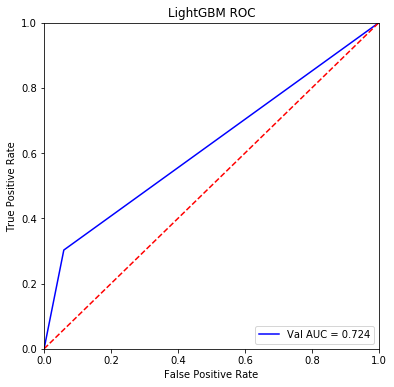

In [51]:
#print("LGBMClassifier模型训练集的准确率：%.3f" %lc.score(x_train, y_train))
#print("LGBMClassifier模型测试集的准确率：%.3f" %lc.score(x_test, y_test))
print("LGBMClassifier模型正确率：%.3f" %acc_lc)

#roc auc
#fpr, tpr, threshold = metrics.roc_curve(y_test, pred_lc)
#roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('LightGBM ROC')
plt.plot(fpr, tpr, 'b', label = 'Val AUC = %0.3f' % auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 使用模型填充训练集

In [52]:
df_test1=df_target.drop(['ID','Avg_Account_Balance','Gender',
                         'Is_Active','Occupation','Region_Code','Credit_Product'],axis=1)
df_test1.head(5)

,Age,Channel_Code,Vintage,Is_Lead
20,62,2,116,0
23,56,1,97,1
43,45,1,91,1
53,65,2,85,1
59,52,2,32,1


使用lightGBM模型预测填充

In [53]:
df_test1_pred=lc.predict_proba(df_test1)
df_test1_pred

array([[0.61747049, 0.38252951],
       [0.27687107, 0.72312893],
       [0.34745389, 0.65254611],
       ...,
       [0.29396598, 0.70603402],
       [0.59306005, 0.40693995],
       [0.13256535, 0.86743465]])

In [54]:
df_IS_Lead=pd.DataFrame(df_test1_pred[:])
padding = df_IS_Lead[1].round()
df_IS_Lead.head()

,0,1
0,0.617470,0.382530
1,0.276871,0.723129
2,0.347454,0.652546
3,0.403626,0.596374
4,0.243163,0.756837


In [55]:
padding.head(10)

0    0.0
1    1.0
2    1.0
3    1.0
4    1.0
5    0.0
6    1.0
7    1.0
8    1.0
9    1.0
Name: 1, dtype: float64

In [56]:
padding.value_counts()

1.0    18690
0.0     4674
Name: 1, dtype: int64

In [57]:
#由于两个表的索引不一样，重置了索引再合并
df_predict = df_target.copy()
df_predict = df_predict.reset_index()
df_predict = df_predict.drop(['Credit_Product'],axis = 1)
df_predict.insert(7,'Credit_Product',padding)
#df_predict = df_predict.reindex(df_predict['index'],method = 'ffill')
#df_predict = df_predict.rename(columns = {'1' = 'Credit_Product'})
df_predict.head(10)

,index,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Credit_Product,Vintage,Avg_Account_Balance,Is_Active,Is_Lead
0,20,FH6YQEAN,1,62,16,1,2,0.0,116,610468,0,0
1,23,BROGXA6N,0,56,4,3,1,1.0,97,3360390,1,1
2,43,N3QPVNRQ,1,45,34,1,1,1.0,91,981020,1,1
3,53,DEXCIQT9,1,65,33,1,2,1.0,85,2427501,0,1
4,59,C7EHNWT6,1,52,27,3,2,1.0,32,381151,1,1
5,68,CNH6A4FO,1,53,21,3,2,0.0,109,795713,1,0
6,73,JJS9MNCV,0,37,33,3,0,1.0,26,1862609,0,1
7,88,JUGC3QPI,1,58,34,1,2,1.0,122,784072,0,1
8,89,GZ2EAXTE,1,50,18,2,2,1.0,37,1600424,1,1
9,90,JLTTWGSK,1,50,4,3,1,1.0,21,910594,1,1


In [58]:
df_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23364 entries, 0 to 23363
Data columns (total 12 columns):
index                  23364 non-null int64
ID                     23364 non-null object
Gender                 23364 non-null int32
Age                    23364 non-null int64
Region_Code            23364 non-null int32
Occupation             23364 non-null int32
Channel_Code           23364 non-null int32
Credit_Product         23364 non-null float64
Vintage                23364 non-null int64
Avg_Account_Balance    23364 non-null int64
Is_Active              23364 non-null int32
Is_Lead                23364 non-null int64
dtypes: float64(1), int32(5), int64(5), object(1)
memory usage: 1.7+ MB


填充完毕，合并两个表，构成完整训练集

In [59]:
train_nonnull = pd.DataFrame()
train_nonnull = pd.concat([df_train,df_predict],sort = True)
train_nonnull.drop(['index'],axis = 1,inplace = True)
train_nonnull.head(10)

,Age,Avg_Account_Balance,Channel_Code,Credit_Product,Gender,ID,Is_Active,Is_Lead,Occupation,Region_Code,Vintage
0,29,302875,0,0.0,0,SCVAQHXI,0,0,2,27,26
1,47,645552,0,0.0,0,BHYZRTQT,1,0,3,26,15
2,44,725777,2,0.0,1,6STHBLXU,1,0,3,33,85
3,77,2297704,2,0.0,1,KVFKFAM7,1,0,1,18,49
4,84,555199,1,0.0,0,RMCZIYYW,0,1,1,29,93
5,29,723062,0,0.0,1,KH58QEYB,0,0,2,30,14
6,26,398488,0,0.0,0,FMM5WDP3,0,0,2,27,13
7,65,575705,1,1.0,1,GUP6J96H,0,0,1,33,67
8,57,1951458,2,1.0,0,WJ8KLGVU,0,0,3,33,121
9,61,344892,2,0.0,1,2ZHMX3ZC,0,0,3,30,56


In [60]:
train_nonnull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196580 entries, 0 to 23363
Data columns (total 11 columns):
Age                    196580 non-null int64
Avg_Account_Balance    196580 non-null int64
Channel_Code           196580 non-null int32
Credit_Product         196580 non-null float64
Gender                 196580 non-null int32
ID                     196580 non-null object
Is_Active              196580 non-null int32
Is_Lead                196580 non-null int64
Occupation             196580 non-null int32
Region_Code            196580 non-null int32
Vintage                196580 non-null int64
dtypes: float64(1), int32(5), int64(4), object(1)
memory usage: 14.2+ MB


In [61]:
train_nonnull.describe()

,Age,Avg_Account_Balance,Channel_Code,Credit_Product,Gender,Is_Active,Is_Lead,Occupation,Region_Code,Vintage
count,196580.000000,1.965800e+05,196580.000000,196580.000000,196580.000000,196580.000000,196580.000000,196580.000000,196580.000000,196580.000000
mean,43.873812,1.128338e+06,0.904110,0.389043,0.546602,0.388849,0.236937,2.103062,19.891016,47.038422
std,14.833586,8.524013e+05,0.885141,0.487534,0.497825,0.487490,0.425204,0.853904,10.866952,32.397558
min,23.000000,2.079000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000
25%,30.000000,6.041320e+05,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,20.000000
50%,43.000000,8.942495e+05,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,19.000000,32.000000
75%,54.000000,1.366154e+06,2.000000,1.000000,1.000000,1.000000,0.000000,3.000000,30.000000,74.000000
max,85.000000,1.035201e+07,3.000000,1.000000,1.000000,1.000000,1.000000,3.000000,34.000000,135.000000


In [62]:
 train.describe()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
count,196580.000000,196580.000000,196580.000000,196580.000000,196580.000000,196580.000000,196580.000000,1.965800e+05,196580.000000,196580.000000
mean,0.546602,43.873812,19.891016,2.103062,0.904110,47.038422,0.531672,1.128338e+06,0.388849,0.236937
std,0.497825,14.833586,10.866952,0.853904,0.885141,32.397558,0.697642,8.524013e+05,0.487490,0.425204
min,0.000000,23.000000,0.000000,0.000000,0.000000,7.000000,0.000000,2.079000e+04,0.000000,0.000000
25%,0.000000,30.000000,11.000000,1.000000,0.000000,20.000000,0.000000,6.041320e+05,0.000000,0.000000
50%,1.000000,43.000000,19.000000,2.000000,1.000000,32.000000,0.000000,8.942495e+05,0.000000,0.000000
75%,1.000000,54.000000,30.000000,3.000000,2.000000,74.000000,1.000000,1.366154e+06,1.000000,0.000000
max,1.000000,85.000000,34.000000,3.000000,3.000000,135.000000,2.000000,1.035201e+07,1.000000,1.000000


验证了除Credit_Product之外数据的一致

### 将填充完缺失值的数据输出

In [63]:
train_nonnull.to_csv('train_nonnull.csv',index=False)